<a href="https://colab.research.google.com/github/19PA1A0484/Artificial-intelligence-and-machine-learning-2nd-year-1st-sem/blob/master/bike_daily_shares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/daily-bike-share.csv')

In [ ]:
df.head()

instant    dteday  season  yr  ...     atemp       hum  windspeed  rentals
0        1  1/1/2011       1   0  ...  0.363625  0.805833   0.160446      331
1        2  1/2/2011       1   0  ...  0.353739  0.696087   0.248539      131
2        3  1/3/2011       1   0  ...  0.189405  0.437273   0.248309      120
3        4  1/4/2011       1   0  ...  0.212122  0.590435   0.160296      108
4        5  1/5/2011       1   0  ...  0.229270  0.436957   0.186900       82

[5 rows x 14 columns]

In [ ]:
df['day']=pd.DatetimeIndex(df['dteday']).day
df.head()

instant    dteday  season  yr  ...       hum  windspeed  rentals  day
0        1  1/1/2011       1   0  ...  0.805833   0.160446      331    1
1        2  1/2/2011       1   0  ...  0.696087   0.248539      131    2
2        3  1/3/2011       1   0  ...  0.437273   0.248309      120    3
3        4  1/4/2011       1   0  ...  0.590435   0.160296      108    4
4        5  1/5/2011       1   0  ...  0.436957   0.186900       82    5

[5 rows x 15 columns]

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
day           0
dtype: int64

In [ ]:
df.describe()

instant      season          yr  ...   windspeed      rentals         day
count  731.000000  731.000000  731.000000  ...  731.000000   731.000000  731.000000
mean   366.000000    2.496580    0.500684  ...    0.190486   848.176471   15.738714
std    211.165812    1.110807    0.500342  ...    0.077498   686.622488    8.809949
min      1.000000    1.000000    0.000000  ...    0.022392     2.000000    1.000000
25%    183.500000    2.000000    0.000000  ...    0.134950   315.500000    8.000000
50%    366.000000    3.000000    1.000000  ...    0.180975   713.000000   16.000000
75%    548.500000    3.000000    1.000000  ...    0.233214  1096.000000   23.000000
max    731.000000    4.000000    1.000000  ...    0.507463  3410.000000   31.000000

[8 rows x 14 columns]

In [ ]:
features=['temp','atemp','hum','windspeed']
df[features+['rentals']].describe()

temp       atemp         hum   windspeed      rentals
count  731.000000  731.000000  731.000000  731.000000   731.000000
mean     0.495385    0.474354    0.627894    0.190486   848.176471
std      0.183051    0.162961    0.142429    0.077498   686.622488
min      0.059130    0.079070    0.000000    0.022392     2.000000
25%      0.337083    0.337842    0.520000    0.134950   315.500000
50%      0.498333    0.486733    0.626667    0.180975   713.000000
75%      0.655417    0.608602    0.730209    0.233214  1096.000000
max      0.861667    0.840896    0.972500    0.507463  3410.000000

<bound method Figure.show of <Figure size 648x432 with 2 Axes>>

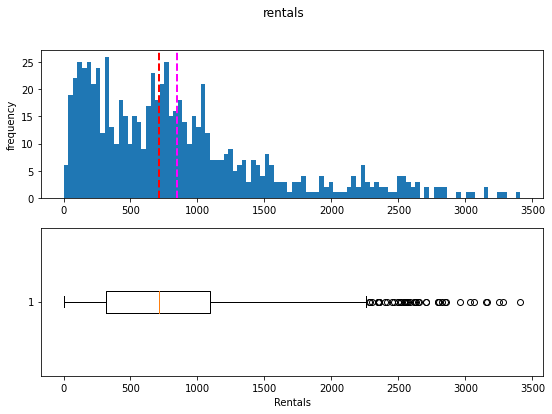

In [ ]:
labels=df['rentals']
fig,ax=plt.subplots(2,1,figsize=(9,6))
ax[0].hist(labels,bins=100)
ax[0].set_ylabel('frequency')
 
ax[0].axvline(labels.mean(),color='magenta',linestyle='dashed',linewidth=2)
 
ax[0].axvline(labels.median(),color='red',linestyle='dashed',linewidth=2)
ax[1].boxplot(labels,vert=False)
ax[1].set_xlabel('Rentals')
fig.suptitle('rentals')
fig.show

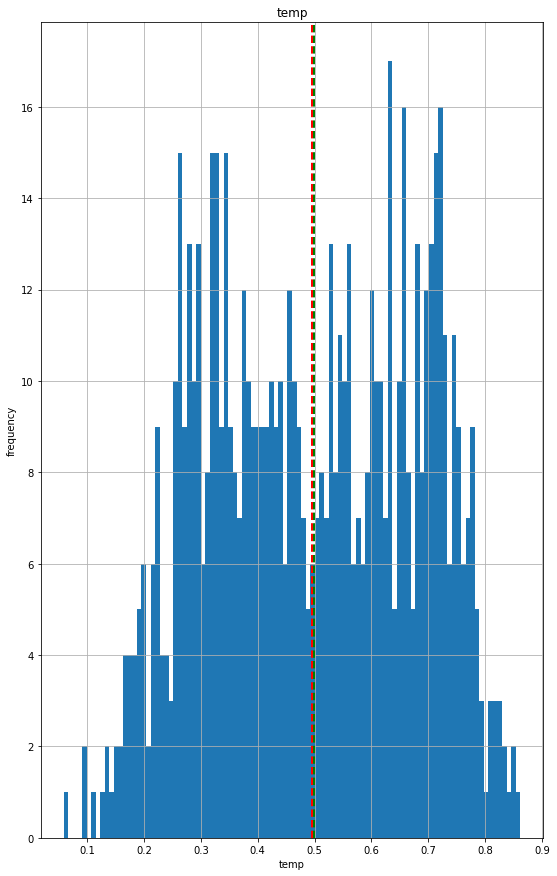

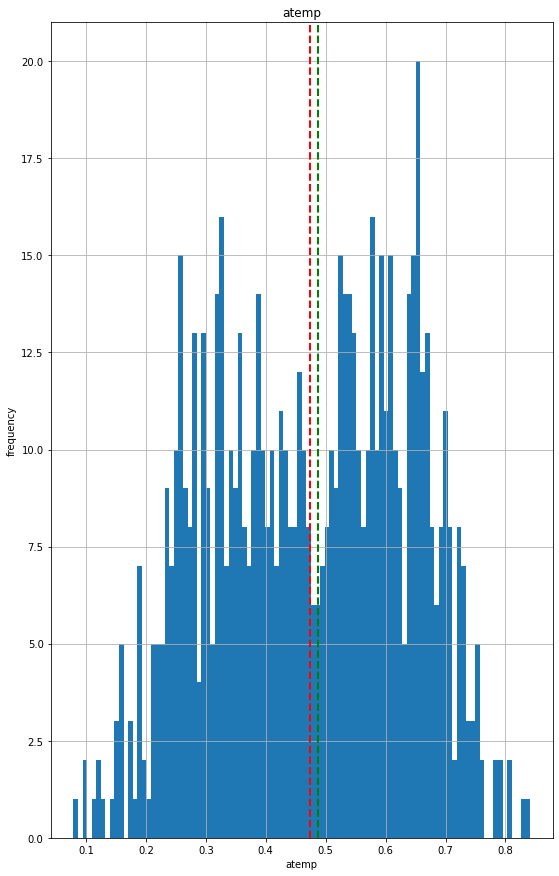

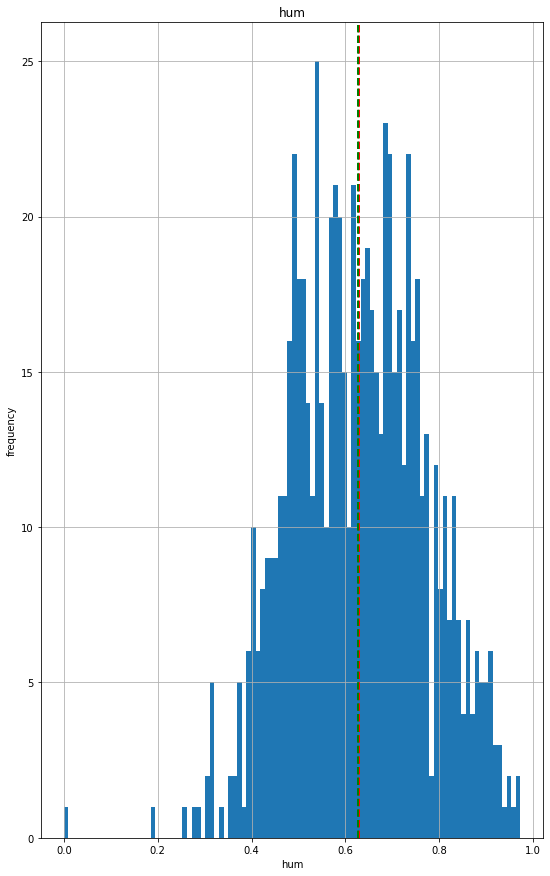

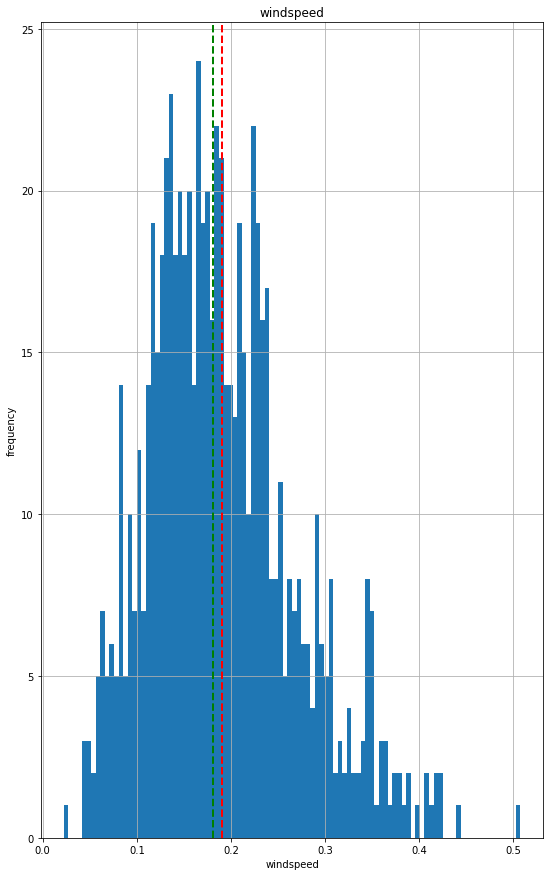

In [ ]:
for i in features:
   fig=plt.figure(figsize=(9,15))
   ax=fig.gca()
   f=df[i]
   f.hist(ax=ax,bins=100)
   ax.set_xlabel(i)
   ax.set_ylabel('frequency')
   ax.set_title(i)
   ax.axvline(f.mean(),color='red',linestyle='dashed',linewidth=2)
   ax.axvline(f.median(),color='green',linestyle='dashed',linewidth=2)
plt.show()

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

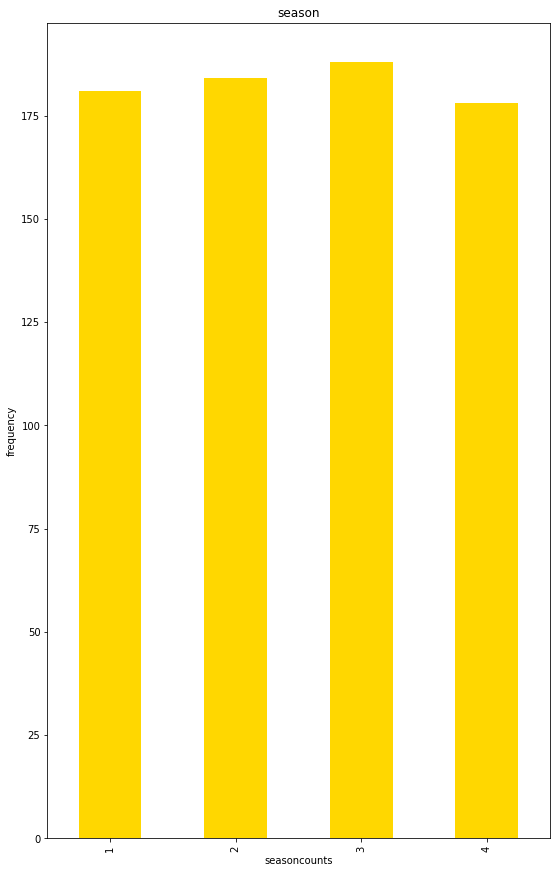

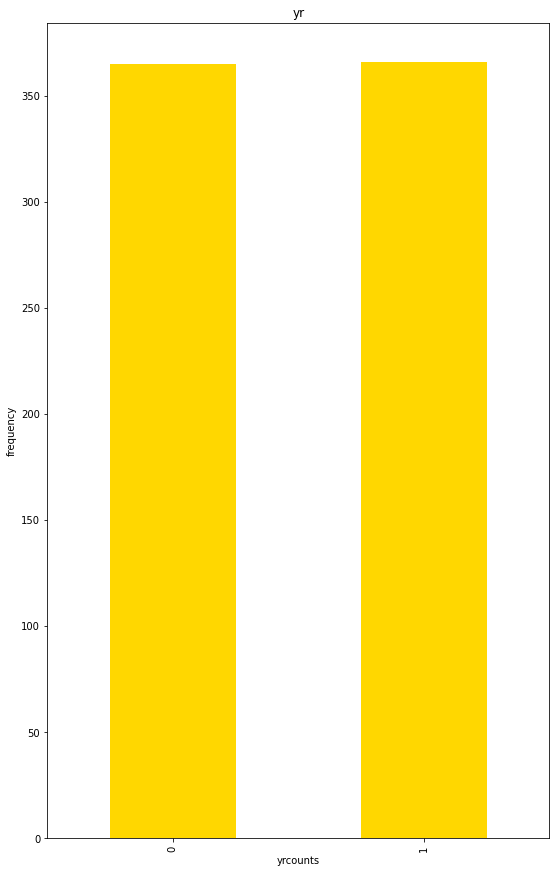

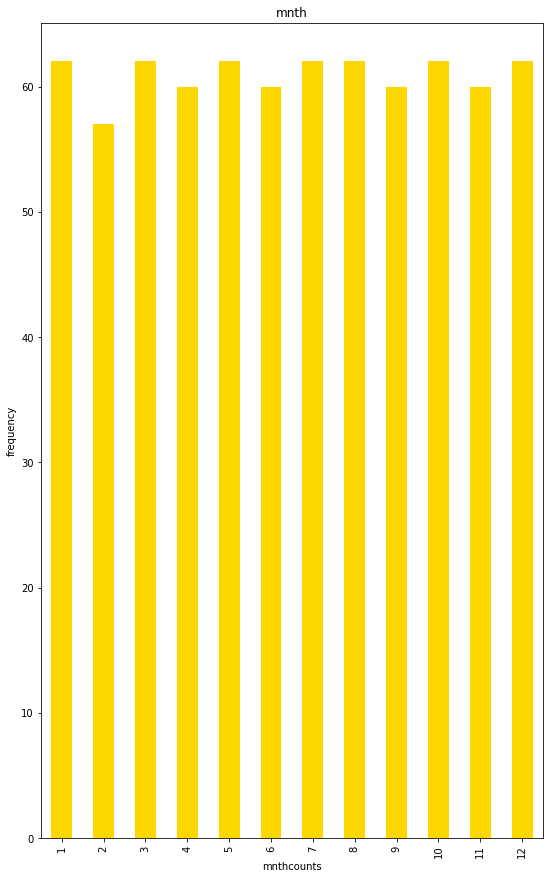

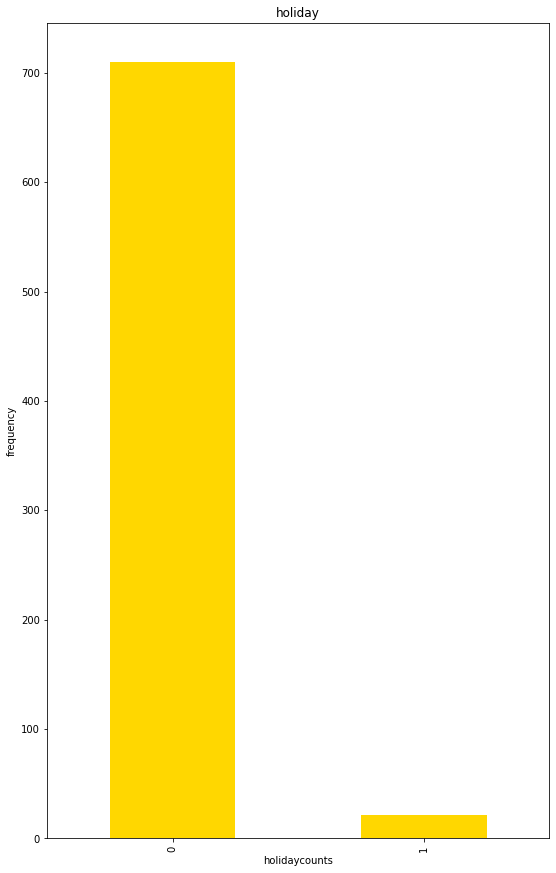

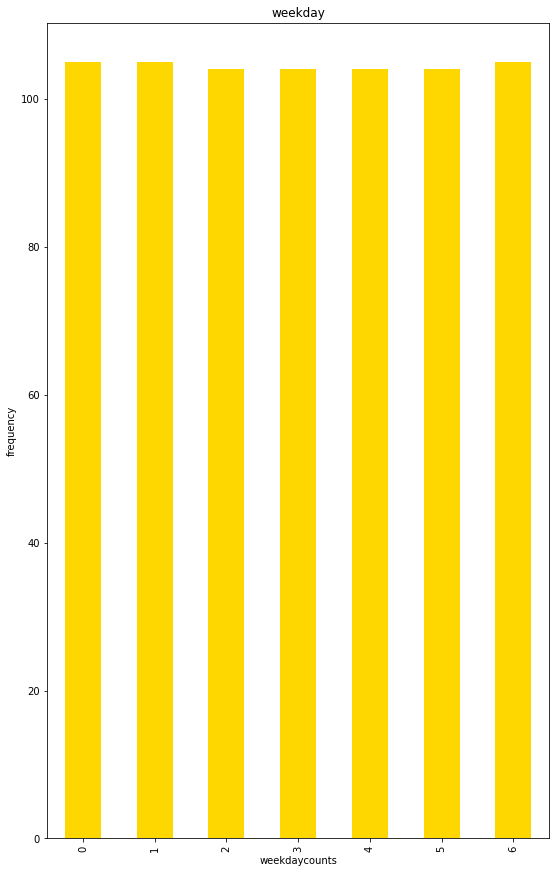

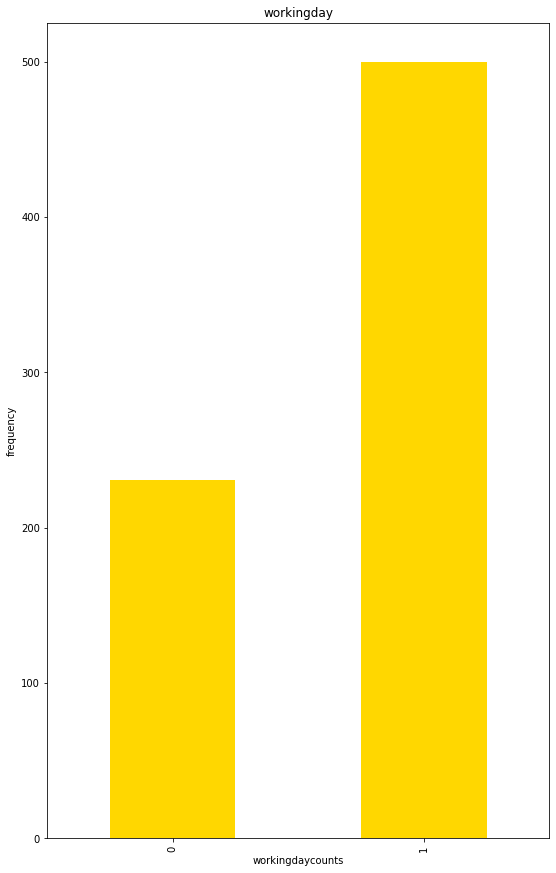

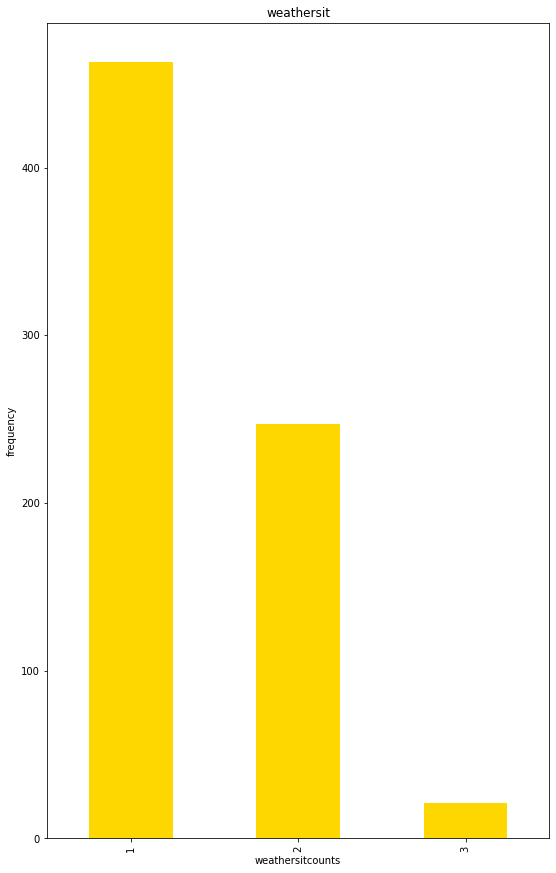

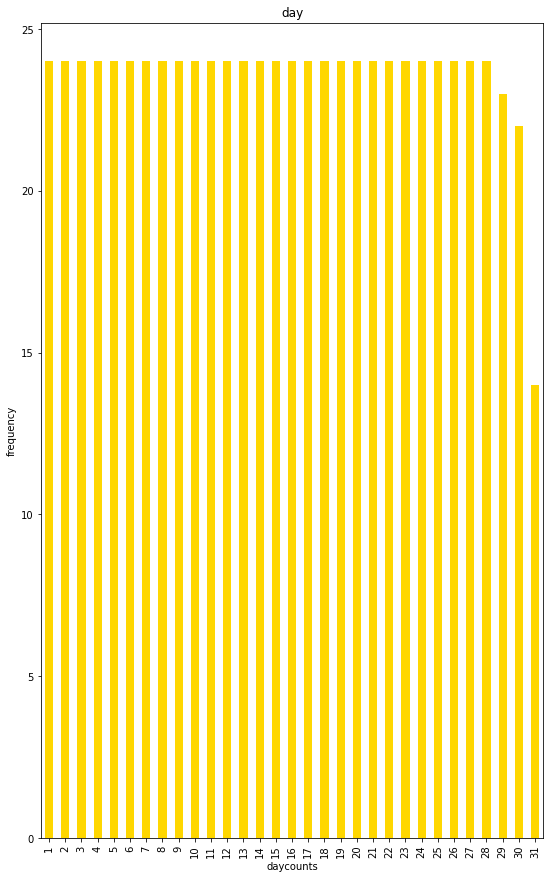

In [ ]:
 
 
 
categorical_features=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit','day']
for i in categorical_features:
   fig=plt.figure(figsize=(9,15))
   ax=fig.gca()
   f=df[i].value_counts().sort_index()
   f.plot.bar(ax=ax,color='gold')
   ax.set_xlabel(i + 'counts')
   ax.set_ylabel('frequency')
   ax.set_title(i)
plt.show()

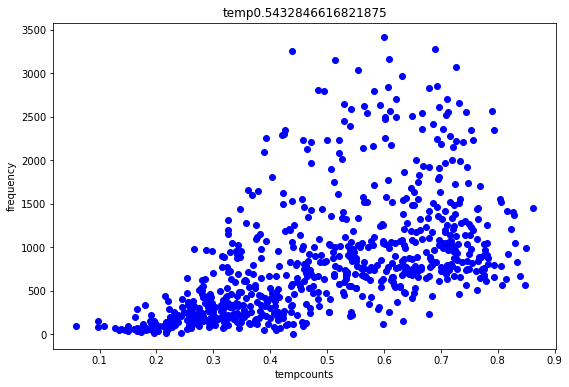

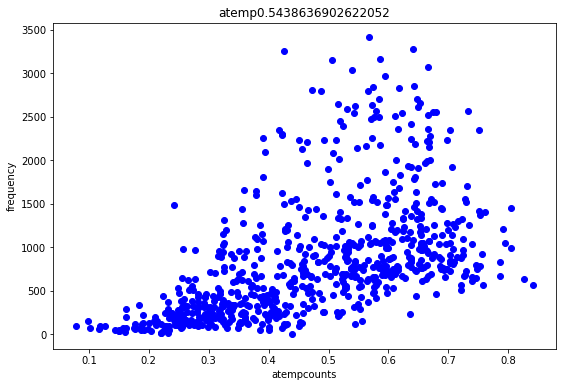

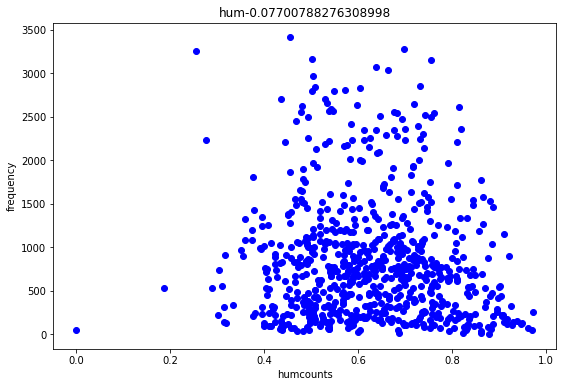

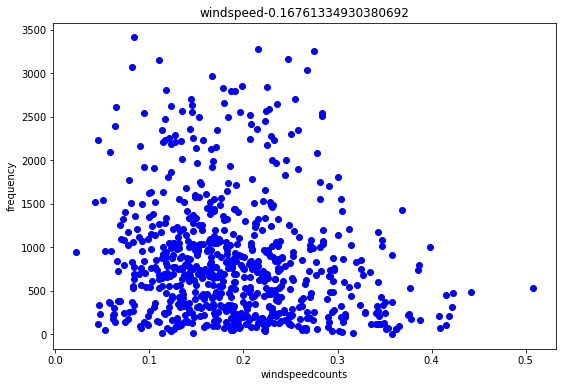

In [ ]:
 for i in features:
   fig=plt.figure(figsize=(9,6))
   ax=fig.gca()
   f=df[i]   
   k=df['rentals']
   correlation=f.corr(k)
   plt.scatter(x=f,y=k,color='blue')
   ax.set_xlabel(i + 'counts')
   ax.set_ylabel('frequency')
   ax.set_title(i + str(correlation))
fig.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

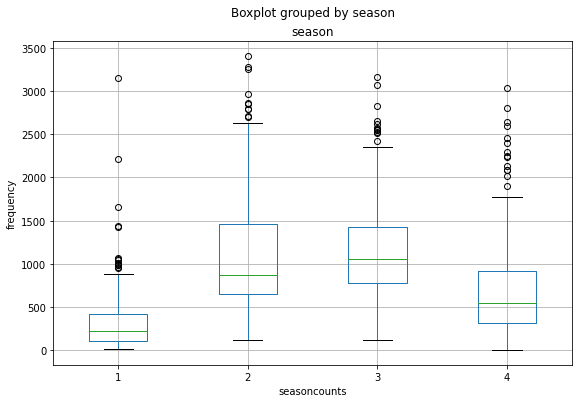

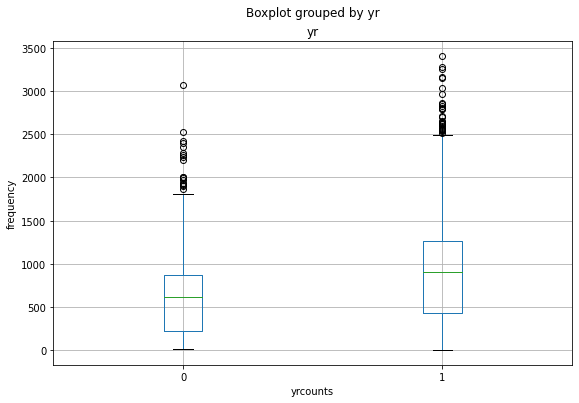

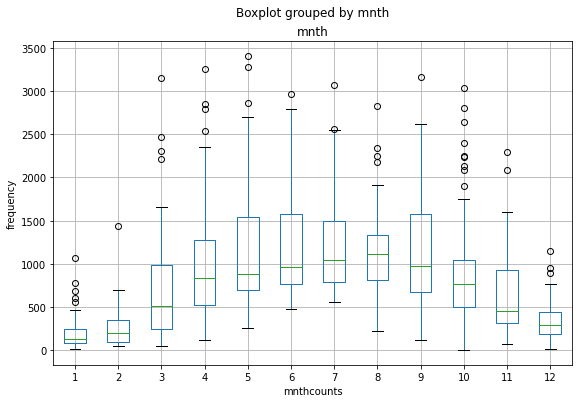

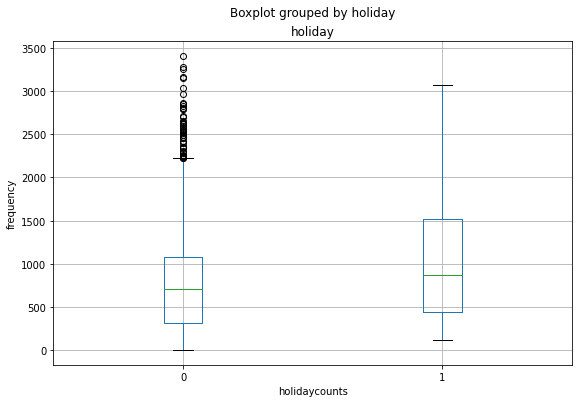

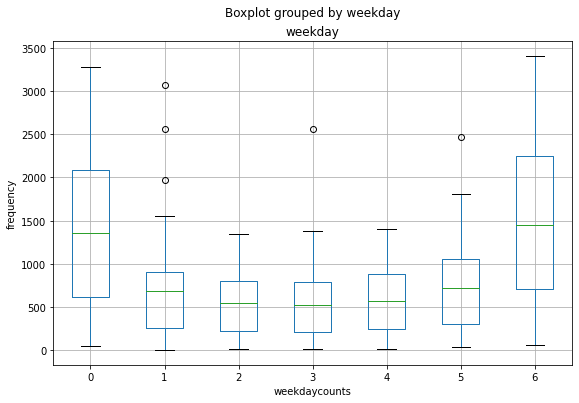

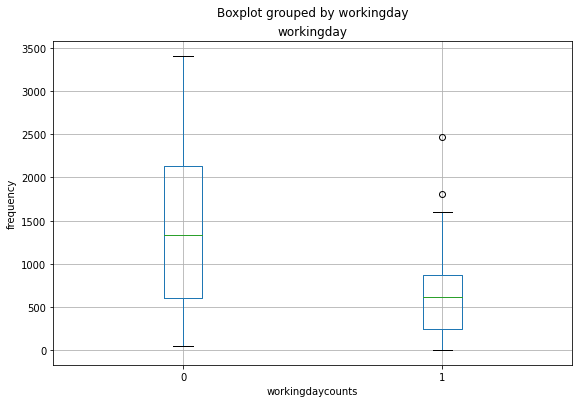

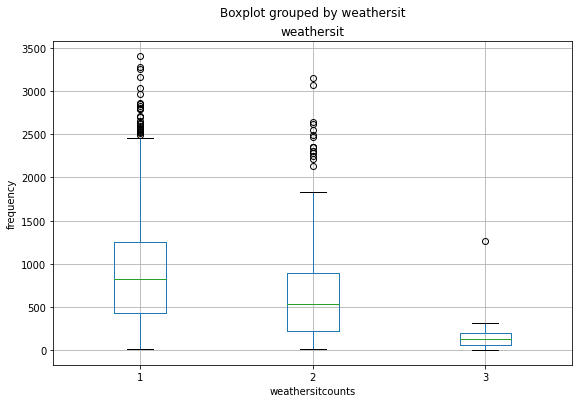

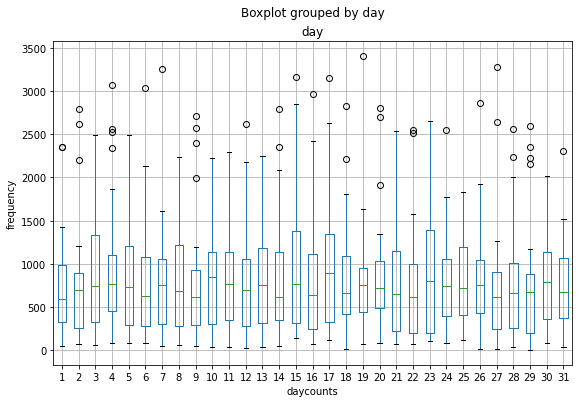

In [ ]:
 for i in categorical_features:
   fig=plt.figure(figsize=(9,6))
   ax=fig.gca()
   df.boxplot(column=['rentals'],by=i,ax=ax)
   ax.set_xlabel(i + 'counts')
   ax.set_ylabel('frequency')
   ax.set_title(i)
plt.show()

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals', 'day'],
      dtype='object')

In [ ]:
X,y=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].values,df['rentals'].values
X.shape

(731, 11)

In [ ]:
print('features',X[:10])

features [[1.        0.        1.        0.        6.        0.        2.
  0.344167  0.363625  0.805833  0.160446 ]
 [1.        0.        1.        0.        0.        0.        2.
  0.363478  0.353739  0.696087  0.248539 ]
 [1.        0.        1.        0.        1.        1.        1.
  0.196364  0.189405  0.437273  0.248309 ]
 [1.        0.        1.        0.        2.        1.        1.
  0.2       0.212122  0.590435  0.160296 ]
 [1.        0.        1.        0.        3.        1.        1.
  0.226957  0.22927   0.436957  0.1869   ]
 [1.        0.        1.        0.        4.        1.        1.
  0.204348  0.233209  0.518261  0.0895652]
 [1.        0.        1.        0.        5.        1.        2.
  0.196522  0.208839  0.498696  0.168726 ]
 [1.        0.        1.        0.        6.        0.        2.
  0.165     0.162254  0.535833  0.266804 ]
 [1.        0.        1.        0.        0.        0.        1.
  0.138333  0.116175  0.434167  0.36195  ]
 [1.        0.     

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [ ]:
X_train.shape

(511, 11)

In [ ]:
X_test.shape

(220, 11)

In [ ]:
from sklearn.linear_model import LinearRegression
k=LinearRegression()
k.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction=k.predict(X_test)
np.set_printoptions(suppress=True)
print('predicted values: ',np.round(prediction)[:10])

predicted values:  [ -15. 1040. 1083. 1039.  913.  463.  980. -190.  983. 1220.]


In [ ]:
print('actual values: ',y_test[:10])

actual values:  [ 439 1070  880  998  763  432  898   47  939 1275]


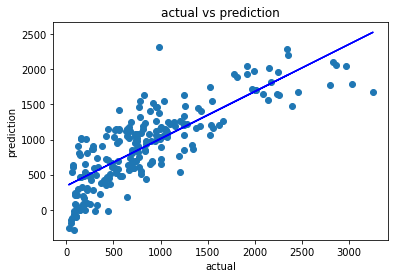

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
plt.scatter(y_test,prediction)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('actual vs prediction')
 
z=np.polyfit(y_test,prediction,1)
k=np.poly1d(z)
plt.plot(y_test,k(y_test),color='blue')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
o=mean_squared_error(y_test,prediction)
o

156830.2801160047

In [ ]:
np.sqrt(o)

396.0180300390434

In [ ]:
r2_score(y_test,prediction)

0.6470421742494797

predicted values:  [ -28. 1011. 1110. 1028.  911.  489.  974. -198.  973. 1222.]
actual values:  [ 439 1070  880  998  763  432  898   47  939 1275]


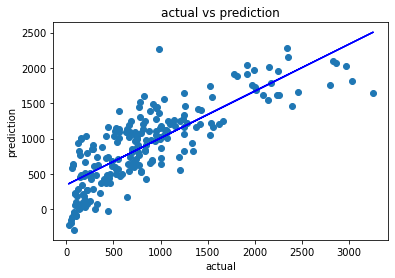

157657.60973265345
397.0612166060209
0.64518020943978


In [ ]:
 from sklearn.linear_model import Lasso
k=Lasso()
k.fit(X_train,y_train)
prediction=k.predict(X_test)
np.set_printoptions(suppress=True)
print('predicted values: ',np.round(prediction)[:10])
print('actual values: ',y_test[:10])
plt.scatter(y_test,prediction)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('actual vs prediction')
 
z=np.polyfit(y_test,prediction,1)
k=np.poly1d(z)
plt.plot(y_test,k(y_test),color='blue')
plt.show()
 
from sklearn.metrics import mean_squared_error,r2_score
o=mean_squared_error(y_test,prediction)
print(o)
print(np.sqrt(o))
print(r2_score(y_test,prediction))

|--- feature_8 <= 0.42
|   |--- feature_5 <= 0.50
|   |   |--- feature_8 <= 0.32
|   |   |   |--- feature_7 <= 0.24
|   |   |   |   |--- feature_8 <= 0.18
|   |   |   |   |   |--- feature_10 <= 0.21
|   |   |   |   |   |   |--- feature_8 <= 0.13
|   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   |   |   |   |--- feature_8 >  0.13
|   |   |   |   |   |   |   |--- value: [117.00]
|   |   |   |   |   |--- feature_10 >  0.21
|   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |--- value: [54.00]
|   |   |   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |   |   |--- value: [67.00]
|   |   |   |   |--- feature_8 >  0.18
|   |   |   |   |   |--- feature_9 <= 0.59
|   |   |   |   |   |   |--- feature_9 <= 0.47
|   |   |   |   |   |   |   |--- value: [333.00]
|   |   |   |   |   |   |--- feature_9 >  0.47
|   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [251.00]
|   |   |   |   |   |   |   |--- feature_4 >  0

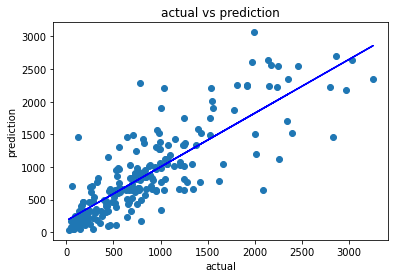

150714.79545454544
388.2200348443463
0.6608055123492568


In [ ]:
 from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
k=DecisionTreeRegressor()
k.fit(X_train,y_train)
tree=export_text(k)
print(tree)
prediction=k.predict(X_test)
np.set_printoptions(suppress=True)
print('predicted values: ',np.round(prediction)[:10])
print('actual values: ',y_test[:10])
plt.scatter(y_test,prediction)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('actual vs prediction')
 
z=np.polyfit(y_test,prediction,1)
k=np.poly1d(z)
plt.plot(y_test,k(y_test),color='blue')
plt.show()
 
from sklearn.metrics import mean_squared_error,r2_score
o=mean_squared_error(y_test,prediction)
print(o)
print(np.sqrt(o))
print(r2_score(y_test,prediction))

predicted values:  [ 161. 1008. 1059. 1065.  803.  420.  709.   80.  921. 1006.]
actual values:  [ 439 1070  880  998  763  432  898   47  939 1275]


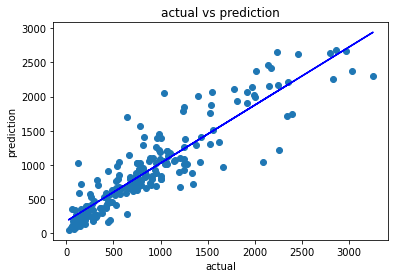

81673.14098181817
285.7851307920308
0.8161887217070882


In [ ]:
 from sklearn.ensemble import RandomForestRegressor
k=RandomForestRegressor()
k.fit(X_train,y_train)
prediction=k.predict(X_test)
np.set_printoptions(suppress=True)
print('predicted values: ',np.round(prediction)[:10])
print('actual values: ',y_test[:10])
plt.scatter(y_test,prediction)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('actual vs prediction')
 
z=np.polyfit(y_test,prediction,1)
k=np.poly1d(z)
plt.plot(y_test,k(y_test),color='blue')
plt.show()
 
from sklearn.metrics import mean_squared_error,r2_score
o=mean_squared_error(y_test,prediction)
print(o)
print(np.sqrt(o))
print(r2_score(y_test,prediction))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

predicted values:  [ 182.  989. 1180. 1065.  857.  508.  693.   26.  957.  995.]
actual values:  [ 439 1070  880  998  763  432  898   47  939 1275]


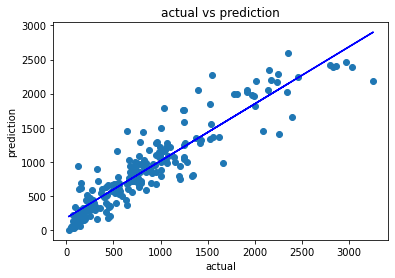

70362.65462172675
265.259598547775
0.8416437847911169


In [ ]:
 from sklearn.ensemble import GradientBoostingRegressor
k=GradientBoostingRegressor()
print(k, '\n')
k.fit(X_train,y_train)
prediction=k.predict(X_test)
np.set_printoptions(suppress=True)
print('predicted values: ',np.round(prediction)[:10])
print('actual values: ',y_test[:10])
plt.scatter(y_test,prediction)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('actual vs prediction')
 
z=np.polyfit(y_test,prediction,1)
k=np.poly1d(z)
plt.plot(y_test,k(y_test),color='blue')
plt.show()
 
from sklearn.metrics import mean_squared_error,r2_score
o=mean_squared_error(y_test,prediction)
print(o)
print(np.sqrt(o))
print(r2_score(y_test,prediction))